# <center> 예제파일을 활용한 텍스트 마이닝 </center>

In [1]:
from konlpy.corpus import kolaw
c = kolaw.open('constitution.txt').read()

In [2]:
print(type(c)) #가져온 데이터의 type을 확인
print(len(c))
print(c[:600])

<class 'str'>
18884
대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
  제3조 대한민


In [3]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
c_sent = sent_tokenize(c)
print(len(c_sent))
print(c_sent[:5])

357
['대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.', '제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.', '②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.', '제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.', '②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
# documnet -> word로 tokenize
from nltk.tokenize import word_tokenize
c_words = word_tokenize(c)
len(c_words) # total word: 4640

4640

In [5]:
" ".join(c_words[:50]) # nltk는 영어에서는 효과적이지만, 한글 토큰화는 잘 되지 않음

'대한민국헌법 유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고 , 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고 , 모든 사회적 폐습과 불의를 타파하며 , 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히'

## koNLPy의 형태소 분석 및 품사 태깅 기능 사용법

In [6]:
from konlpy.tag import Okt
okt = Okt()
tokens_c = okt.morphs(c)    # 형태소 단위로 tokenize

In [7]:
len(tokens_c) # 4640 -> 8796

8796

In [8]:
type(tokens_c)

list

In [9]:
" ".join(tokens_c[:50])

'대한민국 헌법 \n\n 유구 한 역사 와 전통 에 빛나는 우리 대 한 국민 은 3 · 1 운동 으로 건립 된 대한민국 임시정부 의 법 통과 불의 에 항거 한 4 · 19 민주 이념 을 계승 하고 , 조국 의 민주 개혁 과 평화 적 통일 의 사명'

## nltk의 Text class를 이용하여 다양한 기능을 수행

In [10]:
import nltk
c_nltk_text = nltk.Text(tokens_c, name = "대한민국헌법") 
c_nltk_text

<Text: 대한민국헌법>

In [11]:
# 모든 단어의 수
print(len(c_nltk_text.tokens))
# 서로 다른 단어의 수
print(len(set(c_nltk_text.tokens))) # set로 중복 제거

8796
1364


In [12]:
# 단어와 단어의 빈도를 dictionary 형태로 표현 
c_nltk_text.vocab() # 각 단어별 갯수 count

FreqDist({'의': 380, '.': 357, '에': 282, '을': 211, '\n': 195, '은': 179, '제': 178, '이': 176, '한다': 155, '·': 145, ...})

In [13]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

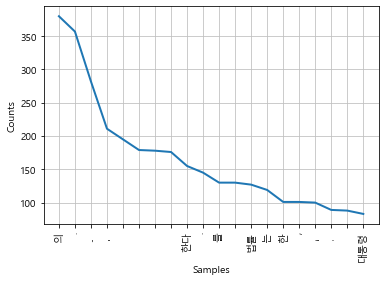

In [14]:
# 상위 빈도 단어들의 빈도를 그래프로 출력
%matplotlib inline
c_nltk_text.plot(20)

In [15]:
tokens_new = []
for token in tokens_c:
    if len(token.strip()) > 1: # 스페이스를 제외한 나머지 문자열의 길이가 둘 이상인 단어만 포함
        tokens_new.append(token.strip())
print(len(tokens_new))

4520


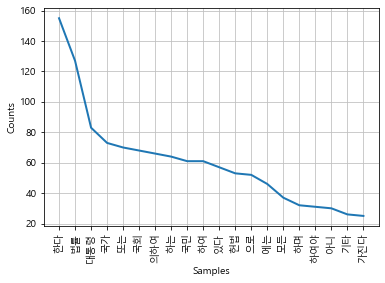

In [16]:
c_nltk_text = nltk.Text(tokens_new, name = "대한민국헌법") # 의미 없는 단어 제거 
c_nltk_text.plot(20)

In [17]:
# 특정한 단어 빈도 확인
c_nltk_text.count('법률')
c_nltk_text.count('대한민국')
c_nltk_text.count('헌법')
c_nltk_text.count('대통령')

83

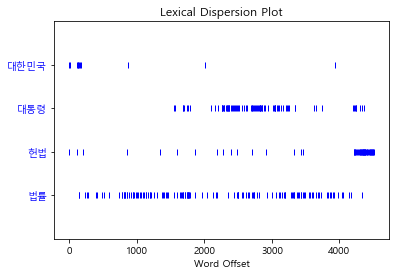

In [18]:
# 주어진 단어들의 위치를 dispersion_plot으로 표시
c_nltk_text.dispersion_plot(['대한민국', '대통령', '헌법', '법률'])

### context를 보는 방법
- concordance(): 주어진 단어를 중심으로 앞 뒤의 단어들을 보여 줌
- similar(): 주어진 단어와 비슷한 context에서 사용된 단어들을 반환
- collocation(): 연어(어떤 단어와 긴밀한 결합을 이루는 단어들) 찾기

In [19]:
c_nltk_text.concordance('헌법')

Displaying 25 of 53 matches:
대한민국 헌법 유구 역사 전통 빛나는 우리 국민 운동 으로 건립 대한민국 임시정부
원히 확보 다짐 하면서 1948년 7월 12일 제정 되고 걸쳐 개정 헌법 이제 국회 의결 거쳐 국민투표 의하여 개정 한다 1조 대한민국 민주
방위 신성한 의무 수행 사명 으로 하며 정치 중립성 준수 된다 6조 헌법 의하여 체결 공포 조약 일반 으로 승인 국제 법규 국내법 같은 효력
청원 권리 가진다 국가 청원 대하 심사 의무 진다 27조 모든 국민 헌법 법률 법관 의하여 법률 의한 재판 받을 권리 가진다 군인 또는 군무
한다 모든 국민 보건 하여 국가 보호 받는다 37조 국민 자유 권리 헌법 열거 되지 아니한 이유 경시 되지 아니 한다 국민 모든 자유 권리 
시 하여야 한다 48조 국회 의장 인과 부의 선출 한다 49조 국회 헌법 또는 법률 특별한 규정 없는 재적 의원 과반수 출석 출석 의원 과반
 에서 예산안 의결 까지 다음 목적 경비 년도 예산 하여 집행 있다 헌법 이나 법률 의하여 설치 기관 또는 시설 유지 운영 법률상 지출 의무
위원회 위원 감사원장 감사 위원 기타 법률 공무원 직무 집행 있어서 헌법 이나 법률 배한 에는 국회 탄핵 의결 있다 항의 탄핵 국회 재적 의
 대하 국가 대표 한다 대통령 국가 독립 영토 보전 국가 계속 성과 헌법 수호 책무 진다 대통령 조국 평화 통일 성실한 의무 진다 행정권 대
이내 후임 선거 한다 69조 대통령 취임 즈음 하여 다음 선서 한다 헌법 준수 하고 국가 보위 하며 조국 평화 통일 국민 자유 복리 증진 민
교사절 신임 접수 또는 파견 하며 선전포고 강화 한다 74조 대통령 헌법 법률 하는 의하여 국군 통수 한다 국군 조직 편성 법률 한다 75조
 계엄 해제 요구 에는 대통령 이를 해제 하여야 한다 78조 대통령 헌법 법률 하는 의하여 공무원 임면한 79조 대통령 법률 하는 의하여 사
 한다 국정 계획 정부 일반 정책 선전 강화 기타 중요한 대외 정책 헌법 개정안 국민투표 조약 법률 

In [20]:
c_nltk_text.similar('헌법')

의하여 공포 행위 공공필요 국무총리 자격 정년


## 명사만 추출해서 처리

In [24]:
nc = okt.nouns(c) # okt.nouns -> nouns_constitution
print(len(nc)) 
print(" ".join(nc[:50]))

3882
대한민국 헌법 유구 역사 전통 우리 국민 운동 건립 대한민국 임시정부 법 통과 불의 항거 민주 이념 계승 조국 민주 개혁 평화 통일 사명 입 각하 정의 인도 동포 애 로써 민족 단결 공고 모든 사회 폐습 불의 타파 자율 조화 바탕 자유민주 질서 더욱 정치 경제 사회 문화 모든


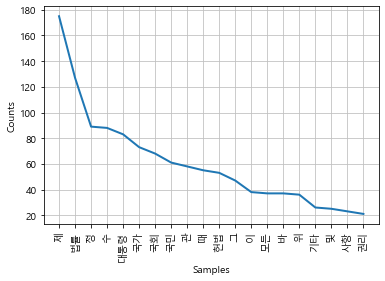

In [25]:
ncnt = nltk.Text(nc, name = "Okt명사")
ncnt.plot(20)

## English Word Cloud
- 참고 예제 코드 출처<br>
https://github.com/amueller/word_cloud<br>
https://github.com/amueller/word_cloud/blob/master/examples/simple.py

In [26]:
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg   # Docs from project gutenberg.org
files_en = gutenberg.fileids()      # Get file ids
doc_en = gutenberg.open('austen-emma.txt').read()

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


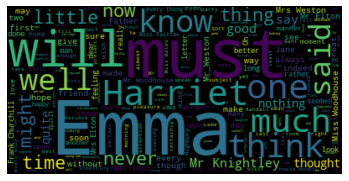

In [27]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(doc_en)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

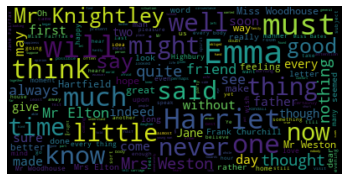

In [28]:
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(doc_en)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 한글 Word Cloud
위에서 사용한 WordCloud 패키지를 이용하여 한글 word cloud도 그릴 수 있음<br>
단 그냥 그리면 폰트가 깨지므로 **한글폰트**를 아래와 같이 **지정**해주어야 함

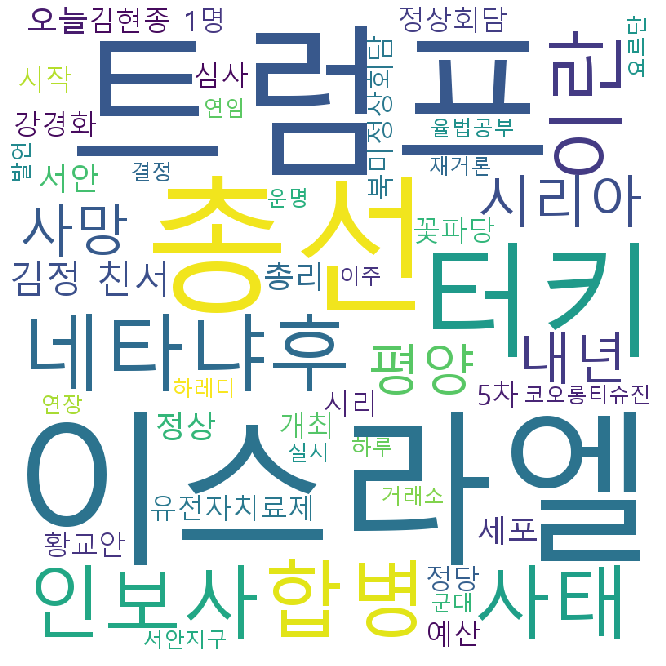

In [29]:
## text 파일로부터 읽어들여 워드클라우드 그리기
import matplotlib.pyplot as plt
from wordcloud import WordCloud
 
font_path = 'c:/Windows/Fonts/malgun.ttf' #한글 폰트의 위치를 지정
wordcloud = WordCloud( #폰트 및 다른 속성들을 지정
    font_path = font_path,
    width = 800,
    height = 800, 
    max_words=50,
    background_color='white' #영어와 달리 배경을 흰색으로
)

text = open('test2.txt').read() #텍스트 파일을 읽음
wordcloud = wordcloud.generate(text) #워드 클라우드 생성
 
fig = plt.figure(figsize=(12,12)) #그림판 크기를 지정
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<Figure size 432x288 with 0 Axes>

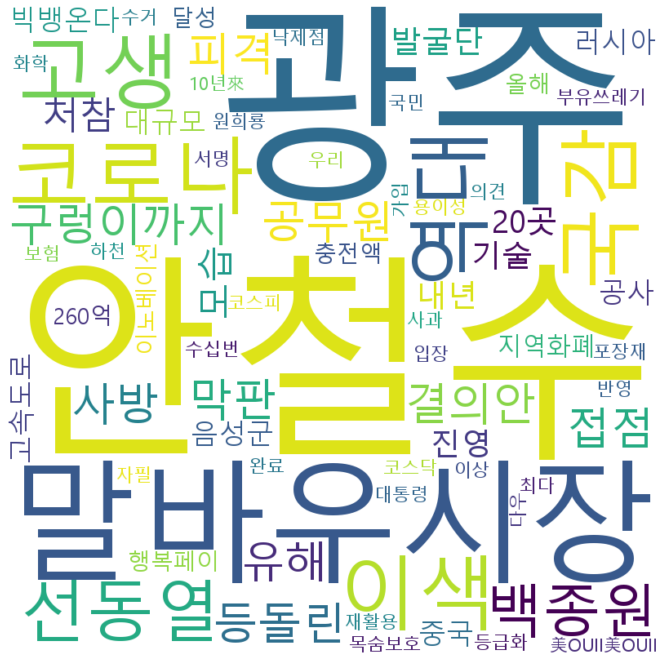

In [30]:
## 다음 한글 기사 읽어오기
from collections import Counter
import random
import webbrowser

from konlpy.tag import Hannanum
import sys
from bs4 import BeautifulSoup
import urllib.request as req


def get_bill_text_daum():
    url1 = "http://media.daum.net" # 다음 뉴스
    res = req.urlopen(url1) 
    soup = BeautifulSoup(res, "html.parser") # html parsing

    text2=soup.select("strong.tit_g > a.link_txt") # headline
    kk=[a.string for a in text2]
    corpus = ''
    for text in kk:
        text = text.replace('\r','').replace('\n','').replace('\t','')
        corpus = corpus + ' ' +text
     
    return corpus

def get_tags(text, ntags=50, multiplier=10):
    h = Hannanum()
    nouns = h.nouns(text) # 명사 tokenize
    count = Counter(nouns)
    return(nouns) 
   
text = get_bill_text_daum()
tags = get_tags(text)
#print(tags)
#print(" ".join(tags))

### 워드클라우드 그리기
wordcloud = WordCloud( #폰트 및 다른 속성들을 지정
    font_path = font_path,
    width = 800,
    height = 800, 
   # max_words=50,
    background_color='white' #영어와 달리 배경을 흰색으로
)

wordcloud = wordcloud.generate(" ".join(tags)) #위에서 만든 tags를 이용하여 word cloud 생성
 
fig = plt.figure()
fig = plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = "bilinear") #글자의 테두리를 매끄럽게... 위의 결과와 비교
plt.axis("off")
plt.show()
fig.savefig('wordcloud_without_axisoff.png') #이미지 파일로 저장

### 동일한 데이터에 대하여 nltk를 이용해 빈도 그래프 그리기

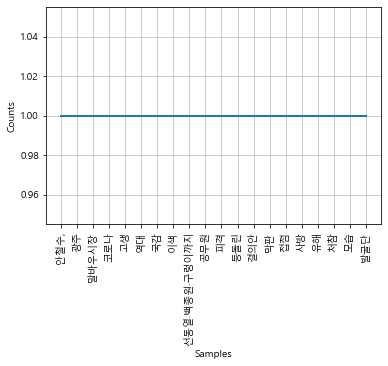

In [32]:
new_tags = []
for token in tags:
    if len(token.strip()) > 1: # 스페이스를 제외한 나머지 문자열의 길이가 둘 이상인 단어만 포함
        new_tags.append(token.strip())

cnt = nltk.Text(new_tags, name = "다음 기사 수집")
cnt.plot(20)

## 외부 csv파일에서 데이터를 읽어와 필요한 부분에 대해서만 word cloud 그리기

In [33]:
import pandas as pd
movie_df = pd.read_csv('movie_data.csv', header=None, names=['review', 'rate', 'name'])
movie_df.columns.tolist()

['review', 'rate', 'name']

In [34]:
movie_df.head()

,review,rate,name
0,오~~ 종합선물셋트,9,인피니티 워
1,크레딧 올라올때부터 충격먹었어요 ㅋㅋㅋㅋ 나중에 더큰 활약기대하겠습니다! 와칸다포에...,10,인피니티 워
2,이제 남은건타노스 밖에,10,인피니티 워
3,타노스는 발암물질이다.,9,인피니티 워
4,정말재미있게봤습니다,10,인피니티 워


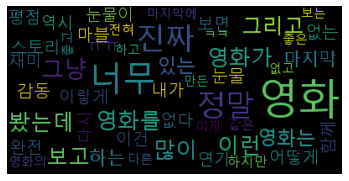

In [35]:
wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 50,
    #width = 800,
    #height = 800, 
    #background_color='white',
    max_words=50
)

wordcloud = wordcloud.generate(" ".join(movie_df.review.tolist())) # rate, name colum의 내용 제외
                                                             # review column의 내용을 가져와서 word cloud 그리기
 
fig = plt.figure()
#fig = plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('wordcloud_without_axisoff.png')